<a href="https://colab.research.google.com/github/Machinescape/CS224N-2019/blob/master/SpringBoard_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv('/content/train.csv')

In [6]:
test = pd.read_csv('/content/test.csv') 

In [7]:
test_labels = pd.read_csv('/content/test_labels.csv')

In [8]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
test = test.merge(test_labels, how='inner', left_on='id', right_on='id')

In [10]:
test = test[~test.toxic==-1]

In [11]:
toxic = train[train['toxic']==1]
severe_toxic = train[train['severe_toxic']==1]
obscene = train[train['obscene']==1]
threat = train[train['threat']==1]
insult = train[train['insult']==1]
identity_hate = train[train['identity_hate']==1]

In [12]:
(train.obscene == 1).sum()

8449

In [13]:
cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
col =  train.columns.values.tolist()
x = [train[train[i]==1].shape[0] for i in cols]

In [14]:
col = col[2:]
col

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

<BarContainer object of 6 artists>

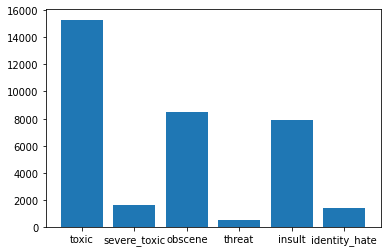

In [15]:
plt.bar(cols, x)

In [16]:
def plot_bar(labels, counts, xlabel, ylabel, subtitle):
    fig = plt.figure(figsize=(10,5))
    
    plt.bar(labels, counts, color=['#422680','#341671','#280659','#660F56','#AE2D67','#F54952'],  width = 0.5)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(subtitle)
    
    for x,y in zip(labels, counts):
        label = "{}".format(y)
        
        plt.annotate(label, (x,y), textcoords= "offset points", xytext=(0,3), ha='center')
        
    plt.show()

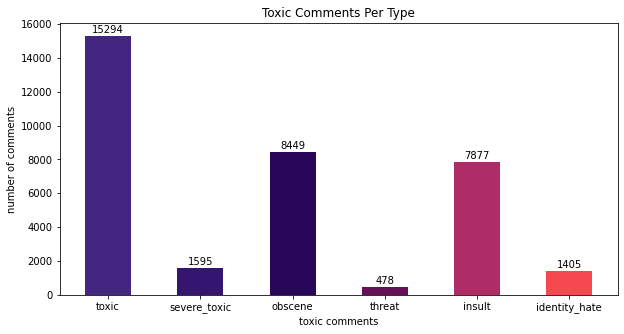

In [17]:
plot_bar(cols, x, 'toxic comments', 'number of comments', "Toxic Comments Per Type")

In [18]:
z = [100*(train[train[i]==1].shape[0])/train.shape[0] for i in cols]

[9.584448302009763,
 0.9995550569965721,
 5.2948217407925,
 0.2995531769557125,
 4.936360616904074,
 0.8804858025581089]

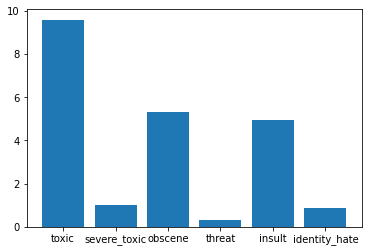

In [19]:
plt.bar(cols, z)
z

In [20]:
initial = train.shape[0]
train.dropna(inplace=True)
afterNA = train.shape[0]

In [21]:
print('initial lenght before dropNa was {}'.format(initial))
print('initial lenght after dropNa was {}'.format(afterNA))

initial lenght before dropNa was 159571
initial lenght after dropNa was 159571


In [22]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [23]:
train.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [24]:
train["toxic"].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [25]:
df_corr = train.iloc[:,2:]
df_corr.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


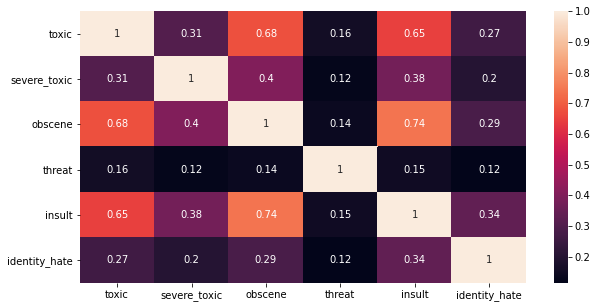

In [26]:
corr = df_corr.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, xticklabels= df_corr.columns.values, yticklabels= df_corr.columns.values, annot =True)

In [27]:
clean1 = train.iloc[:,2:0]
clean1= train[(train['toxic']==1)|(train['severe_toxic']==1)|(train['obscene']==1)|(train['threat']==1)|(train['insult']==1)|(train['identity_hate']==1)]

In [28]:
clean = train.iloc[:,2:].sum(axis=1)
train['clean'] = (clean >0).astype(int)
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [29]:
train[train['clean']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,1
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,1
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0,1
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0,1
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0,1


In [30]:
train.rename(columns={'clean': 'dirty'}, inplace=True)

(array([126021.,  20285.,   6626.,   2605.,   1200.,    736.,    569.,
           490.,    397.,    642.]),
 array([   6. ,  505.4, 1004.8, 1504.2, 2003.6, 2503. , 3002.4, 3501.8,
        4001.2, 4500.6, 5000. ]),
 <a list of 10 Patch objects>)

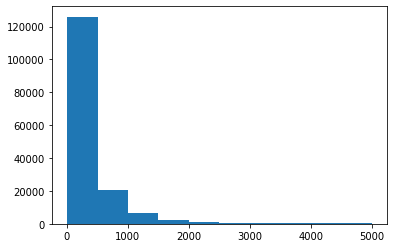

In [31]:
#Plotting the distribution of the sentence sizes 
plt.hist(train['comment_text'].map(len))

In [32]:
print('The maximum sentence lenght is: ', train['comment_text'].map(len).max())
print('The minimum sentence lenght is: ', train['comment_text'].map(len).min())

The maximum sentence lenght is:  5000
The minimum sentence lenght is:  6


(array([14173.,  1223.,   346.,   115.,    69.,    50.,    35.,    26.,
           39.,   149.]),
 array([   8. ,  507.2, 1006.4, 1505.6, 2004.8, 2504. , 3003.2, 3502.4,
        4001.6, 4500.8, 5000. ]),
 <a list of 10 Patch objects>)

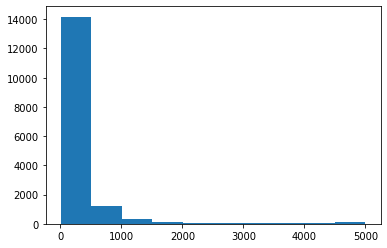

In [33]:
plt.hist(train[train['dirty']==1]['comment_text'].map(len))

(array([111859.,  19054.,   6278.,   2489.,   1131.,    686.,    534.,
           464.,    358.,    493.]),
 array([   6. ,  505.4, 1004.8, 1504.2, 2003.6, 2503. , 3002.4, 3501.8,
        4001.2, 4500.6, 5000. ]),
 <a list of 10 Patch objects>)

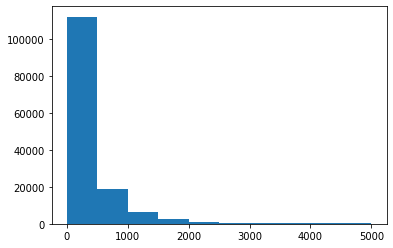

In [34]:
# Then clean words
plt.hist(train[train['dirty']==0]['comment_text'].map(len))

(array([124789.,  20185.,   6599.,   2596.,   1193.,    734.,    567.,
           487.,    392.,    624.]),
 array([   6. ,  505.4, 1004.8, 1504.2, 2003.6, 2503. , 3002.4, 3501.8,
        4001.2, 4500.6, 5000. ]),
 <a list of 10 Patch objects>)

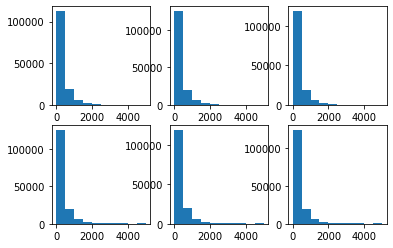

In [35]:
fig, axs = plt.subplots(2,3)
axs[0,0].hist(train[train['toxic']==0]['comment_text'].map(len))
axs[0,1].hist(train[train['severe_toxic']==0]['comment_text'].map(len))
axs[0,2].hist(train[train['obscene']==0]['comment_text'].map(len))
axs[1,0].hist(train[train['threat']==0]['comment_text'].map(len))
axs[1,1].hist(train[train['insult']==0]['comment_text'].map(len))
axs[1,2].hist(train[train['identity_hate']==0]['comment_text'].map(len))
#

In [36]:
!pip install wordcloud

In [37]:
from wordcloud import wordcloud, STOPWORDS
import seaborn as sns

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import time
import re
import sys
import warnings

In [39]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [40]:
def cleanHtml(sentence):# function to clean HTML tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]', r'', sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r'', cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence): #function to clean none alphabets
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [41]:
train['comment_text'] = train['comment_text'].str.lower()
train['comment_text'] = train['comment_text'].apply(cleanHtml)
train['comment_text'] = train['comment_text'].apply(cleanPunc)
train['comment_text'] = train['comment_text'].apply(keepAlpha)

In [42]:
test.comment_text = test.comment_text.str.lower()

In [43]:
test.comment_text = test.comment_text.apply(cleanHtml)
test.comment_text = test.comment_text.apply(cleanPunc)
test.comment_text = test.comment_text.apply(keepAlpha)

In [44]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,dirty
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impro...,0,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,0


In [45]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#words to update stop_words with
to_update =['one','two','three','four','five','six','seven','eight','nine','ten']

stop_words.update(to_update)

print(stop_words)
#stop_words.update(['zero','one','two','three',])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'him', 'more', "wasn't", 'had', 'are', 'we', 'if', "shan't", 'into', 'nor', 'd', 'of', 'six', 'was', 'being', 'a', 'our', "you're", 'aren', 'do', 'nine', 'too', 'them', 'is', 'did', 'why', 'some', 'most', 'my', 'himself', 'his', "should've", "hadn't", 'shan', 'who', 'yourselves', "doesn't", 'doing', 'to', 'haven', 'two', 'wasn', 'were', 'one', 'mustn', 'but', 'so', 'during', 't', 'm', "you'll", "wouldn't", 'between', 're', 'been', 'your', 'an', 'needn', "mightn't", 'me', 'three', 'out', 'the', 'all', 'myself', 'few', 'only', 'her', 'seven', 'here', 'further', 'its', 'i', 'hers', 'as', 'against', 'won', 'hadn', 'until', 'through', 'how', 'having', 'once', 'ten', "couldn't", 'ma', 'four', "won't", 'this', 'couldn', "weren't", 'have', 'each', 'you', "didn't", 'at', 'with', 'no', 'when', 'he', "don't", "you'd", 'itself', "it's", 'there', 'don', 'after', 'about', 'these', 'or', "m

In [46]:
re_stop_words = re.compile(r"\b("+"|".join(stop_words) + ")\\W",re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

In [47]:
train['comment_text'] = train['comment_text'].apply(removeStopWords)
#test.comment_text = test.comment_text.apply(removeStopWords)

In [48]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,dirty
0,0000997932d777bf,explanation edits made username hardcore m...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour im seemingly ...,0,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy c...,0,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestions improvement ...,0,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats on,0,0,0,0,0,0,0


In [49]:
stemmer = SnowballStemmer("english")

def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

train['comment_text'] = train['comment_text'].apply(stemming)
test.comment_text = test.comment_text.apply(stemming)

In [50]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,dirty
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,daww match background colour im seem stuck tha...,0,0,0,0,0,0,0
2,000113f07ec002fd,hey man im realli tri edit war guy constant re...,0,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggest improv wonder section s...,0,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chanc rememb page that on,0,0,0,0,0,0,0


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train.comment_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [52]:
vectorizer.fit(test.comment_text)
x_test = vectorizer.transform(test.comment_text)

In [53]:
#ramesh is the peron indiviual  are mthplotlib
x_train = vectorizer.transform(train.comment_text)
y_train = train.drop(labels = ['id', 'comment_text'], axis=1)

In [54]:
def transformed(sentence):
    sentence = str(sentence).str.lower()
    sentence = stemming(removeStopWords(keepAlpha(cleanPunc(cleanHtml(sentence)))))

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [56]:
LogReg_pipeline = Pipeline([('cif', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1))])

In [57]:
for col in train.columns.tolist()[2:-1]:
    print('Processing {} comments........'.format(col))
    
    #Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[col])
    
    #calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {} '.format(accuracy_score(test[col], prediction)))

Processing toxic comments........
Test accuracy is 0.9968732725262576 
Processing severe_toxic comments........
Test accuracy is 1.0 
Processing obscene comments........
Test accuracy is 0.998151603095633 
Processing threat comments........
Test accuracy is 0.999879076838032 
Processing insult comments........
Test accuracy is 0.9983934494195689 
Processing identity_hate comments........
Test accuracy is 0.9996372305140961 


In [58]:
#LSTM Section
#LSTM Section
#LSTM Section

In [59]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [60]:
max_features = vocab_size = 30000
embedding_dim = 300
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"



In [61]:
tokenizer = Tokenizer(num_words =max_features)
tokenizer.fit_on_texts(list(train.comment_text.values))

In [62]:
tokenized_train_sequence = tokenizer.texts_to_sequences(train.comment_text.values)
tokenized_test_sequence = tokenizer.texts_to_sequences(test.comment_text.values)

In [63]:
padded_train = pad_sequences(tokenized_train_sequence, maxlen = max_length)
padded_test = pad_sequences(tokenized_test_sequence, maxlen=max_length)

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)), 
    tf.keras.layers.Dense(6, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [65]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 300)          9000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 600)               1442400   
_________________________________________________________________
dense (Dense)                (None, 6)                 3606      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 10,446,013
Trainable params: 10,446,013
Non-trainable params: 0
_________________________________________________________________


In [66]:
num_epochs = 30
history = model.fit(padded_train, np.array(train.toxic.values), epochs=num_epochs, validation_data=(padded_test, np.array(test.toxic.values)))

Epoch 1/30
4987/4987 [==============================] - 546s 108ms/step - loss: 0.1675 - accuracy: 0.9409 - val_loss: 0.0796 - val_accuracy: 0.9691
Epoch 2/30
4987/4987 [==============================] - 537s 108ms/step - loss: 0.0848 - accuracy: 0.9670 - val_loss: 0.0835 - val_accuracy: 0.9726
Epoch 3/30
4987/4987 [==============================] - 537s 108ms/step - loss: 0.0662 - accuracy: 0.9737 - val_loss: 0.1143 - val_accuracy: 0.9406
Epoch 4/30
4987/4987 [==============================] - 538s 108ms/step - loss: 0.0485 - accuracy: 0.9814 - val_loss: 0.1418 - val_accuracy: 0.9372
Epoch 5/30
4987/4987 [==============================] - 536s 108ms/step - loss: 0.0330 - accuracy: 0.9877 - val_loss: 0.1626 - val_accuracy: 0.9302
Epoch 6/30
4987/4987 [==============================] - 537s 108ms/step - loss: 0.0236 - accuracy: 0.9915 - val_loss: 0.1947 - val_accuracy: 0.9287
Epoch 7/30
4987/4987 [==============================] - 537s 108ms/step - loss: 0.0171 - accuracy: 0.9943 - val_

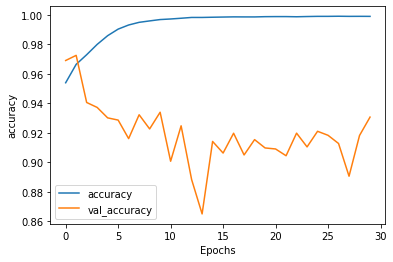

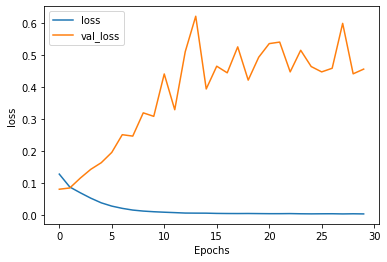

In [67]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")